In [77]:
from matplotlib import pyplot as plt
from numpy import*
import random
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10 # Define as dimensões dos gráficos

In [78]:
n_alunos = range(1, 26)
dados = {}

for posicao in n_alunos:
    chave = str(posicao)
    prova = 1 
    notas = []
    while prova <= 6:
        nota = random.randrange(0, 11)
        notas.append(nota)
        prova += 1
        
    dados.update({chave: notas})

In [79]:
def ordena_notas(listagem):
    """Função para ordenar as notas em ordem decrescente"""
    ordenadas = sorted(listagem, reverse=True)
    return ordenadas

def calcula_media(listagem):
    """Função para calcular a média das três maiores notas"""
    lista_ordenada = ordena_notas(listagem)
    pos = 0 
    soma = 0
    while pos < 3:
        soma += lista_ordenada[pos]
        pos += 1
    return round(soma/3, 2)

def pega_notas(dicionario, posicao_nota):
    """Função que recebe um dicionário cujos valores são um interável com as notas dos alunos e 
    recebe a posição da nota desejada (Maior nota, 2° maior nota ...)"""
    
    lista = []
    valores = dicionario.values()
    for i in valores:
        maior_nota = ordena_notas(i)[posicao_nota - 1]
        lista.append(maior_nota)
    return lista 

def legenda_automatica(grafico):
    """ Adiciona a legenda acima da coluna do gráfico de acordo com a altura desta """
    for i in grafico:
        altura = i.get_height()
        plt.annotate(f'{altura}', xy=(i.get_x() + i.get_width()/2, altura), xytext=(0, 2), textcoords="offset points", ha="center")

In [80]:
medias_alunos = {chave: calcula_media(valor) for chave, valor in dados.items()}

### Gráfico de colunas mostrando as 3 maiores notas de cada aluno

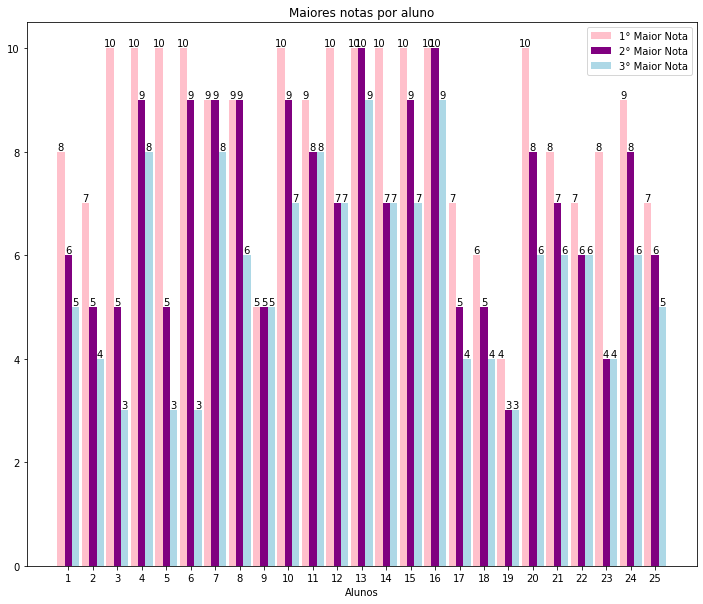

In [81]:
x = arange(len(n_alunos))
largura = 0.3 # Largura das counas
shift = (largura/2)

notas_1 = pega_notas(dados, 1)
notas_2 = pega_notas(dados, 2)
notas_3 = pega_notas(dados, 3)

grafico1 = plt.bar(x - 3 * shift, notas_1, width=largura, label="1° Maior Nota", color="pink", align="edge")
grafico2 = plt.bar(x, notas_2, width=largura, label="2° Maior Nota", color="purple", align="center")
grafico3 = plt.bar(x + shift, notas_3, width=largura, label="3° Maior Nota", color="lightblue", align="edge")

legenda_automatica(grafico1)
legenda_automatica(grafico2)
legenda_automatica(grafico3)

plt.xlabel("Alunos")
plt.title("Maiores notas por aluno")
plt.xticks(x, dados.keys())
plt.legend()
plt.show()

### Histograma com as médias finais

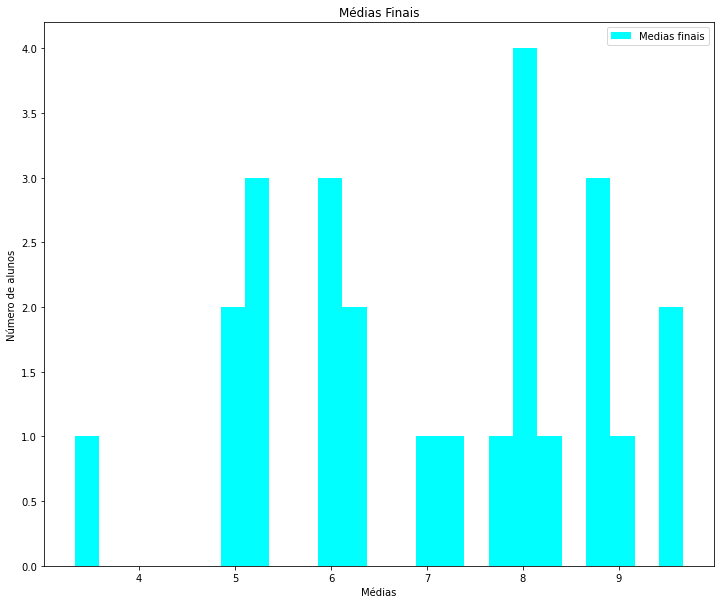

In [82]:
grafico = plt.hist(medias_alunos.values(), bins=25, align="mid", histtype="barstacked", color="cyan", label="Medias finais")
plt.legend()
plt.xlabel("Médias")
plt.ylabel("Número de alunos")
plt.title("Médias Finais")
plt.show()

In [83]:
media0 = 0
media1 = 0
media2 = 0
media3 = 0
media4 = 0
media5 = 0
media6 = 0
media7 = 0
media8 = 0
media9 = 0
media10 = 10

for i in medias_alunos:
    valor = medias_alunos.get(i)
    if 0 <= valor < 1:
        media0 += 1
    if 1 <= valor < 2:
        media1 += 1
    if 2 <= valor < 3:
        media2 += 1
    if 3 <= valor < 4:
        media3 += 1
    if 4 <= valor < 5:
        media4 += 1
    if 5 <= valor < 6:
        media5 += 1
    if 6 <= valor < 7:
        media6 += 1
    if 7 <= valor < 8:
        media7 += 1
    if 8 <= valor < 9:
        media8 += 1
    if 9 <= valor < 10:
        media9 += 1
    if 10 <= valor < 11:
        media10 += 1
        
reprovados = media0 + media1 + media2 + media3 + media4
aprovados = media5 + media6 + media7 + media8 + media9 + media10

### Gráfico de pizza (Aprovados/Reprovados)

In [ ]:
plt.pie((aprovados, reprovados), explode=(0, 0.1), autopct="%1.2f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.legend(("Aprovados", "Reprovados"), loc="right")
plt.title("Porcentagem Aprovados/Reprovados")
plt.show()